In [8]:
#import dependencies 

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter('ignore')


In [9]:
# read in unified CSV

raw_economic_data = pd.read_csv('econ_happy_data_allyears.csv')



In [10]:
raw_economic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 19 columns):
Unnamed: 0                           216 non-null int64
Avg. Wages (Annual)                  216 non-null int64
Avg. Work Hours (Annual)             216 non-null int64
Confidence in national government    216 non-null int64
Delivery Quality                     216 non-null int64
Democratic Quality                   216 non-null int64
Freedom to make life choices         216 non-null int64
GDP (constant 2010 US$)              216 non-null int64
Healthy life expectancy at birth     216 non-null int64
Happiness Index                      216 non-null int64
Log GDP per capita                   216 non-null int64
Negative affect                      216 non-null int64
Perceptions of corruption            216 non-null int64
Population density                   216 non-null int64
Positive affect                      216 non-null int64
Probability of dying at age 5-14     216 non-null int64

In [11]:
# limit columns to only strongest features 

narrow_econ_data = raw_economic_data[["Avg. Wages (Annual)",
                   "Population density",
                   "GDP (constant 2010 US$)", 
                   "Happiness Index"]]

narrow_econ_data.head()


,Avg. Wages (Annual),Population density,GDP (constant 2010 US$),Happiness Index
0,52252,2,1144260000000,7
1,50096,101,391893000000,7
2,50872,359,483548000000,6
3,45502,3,1613460000000,7
4,24960,22,218538000000,6


In [12]:
# rename columns for easier visualization

rev_narrow_econ_data = narrow_econ_data.rename(columns={"Avg. Wages (Annual)": "Avgerage Wages",
                                                       "Population density (people per sq. km of land area)": "Population Density",
                                                       "GDP (constant 2010 US$)": "GDP"})



In [13]:
# assign X (data) and y (target)

X = rev_narrow_econ_data.drop("Happiness Index", axis=1)
y = rev_narrow_econ_data["Happiness Index"]
print(X.shape, y.shape)


(216, 3) (216,)


In [14]:
# establish variable to hold feature names (the names of the remaining columns)

feature_names = X.columns


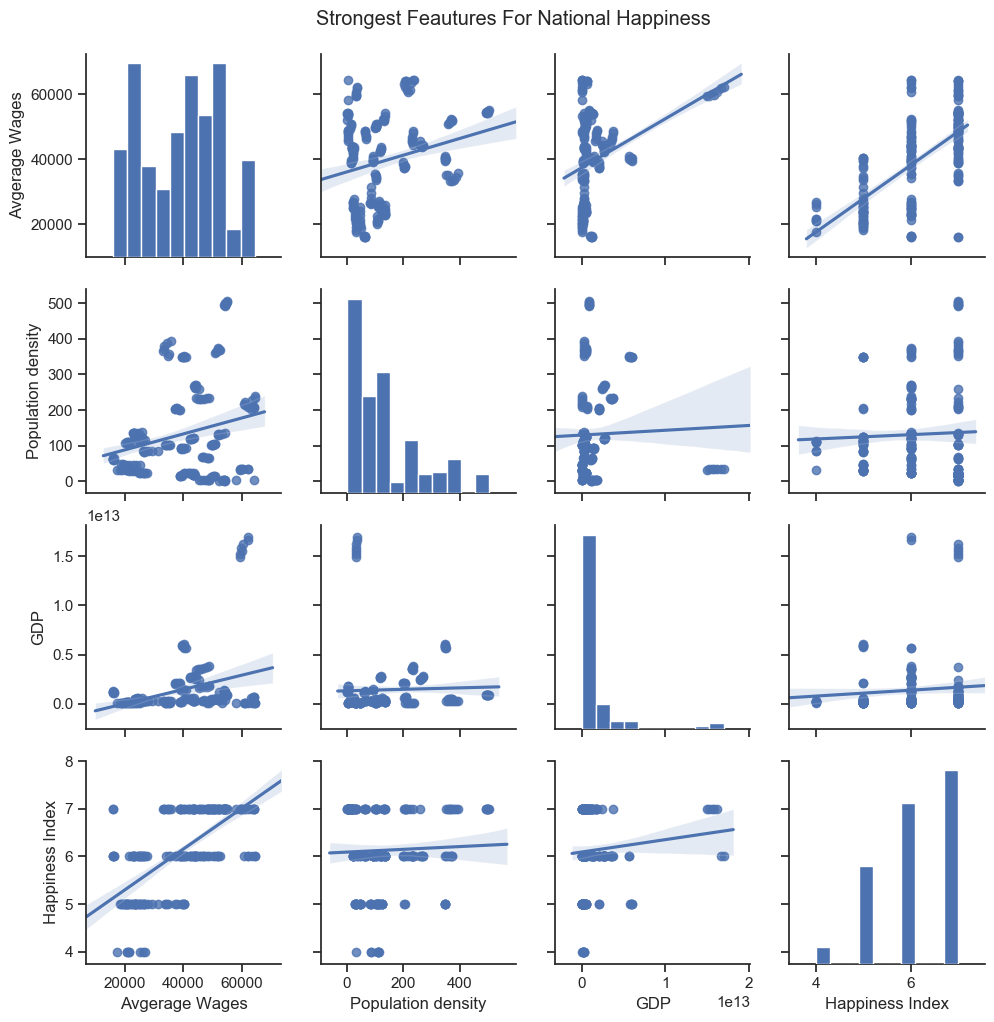

In [15]:
# visualize data prior to splitting

p = sns.pairplot(rev_narrow_econ_data, kind="reg")
p.fig.suptitle("Strongest Feautures For National Happiness", y=1.02)
p.savefig("happiness_pairplot.png")


In [16]:
# split data into training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [17]:
# create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.7777777777777778

In [18]:
# calculate feature importance

importances = rf.feature_importances_
importances


array([0.36104757, 0.31781356, 0.32113887])

In [19]:
# sort the features by their importance

sorted(zip(rf.feature_importances_, feature_names), reverse=True)


[(0.3610475687959995, 'Avgerage Wages'),
 (0.3211388749821857, 'GDP'),
 (0.31781355622181473, 'Population density')]

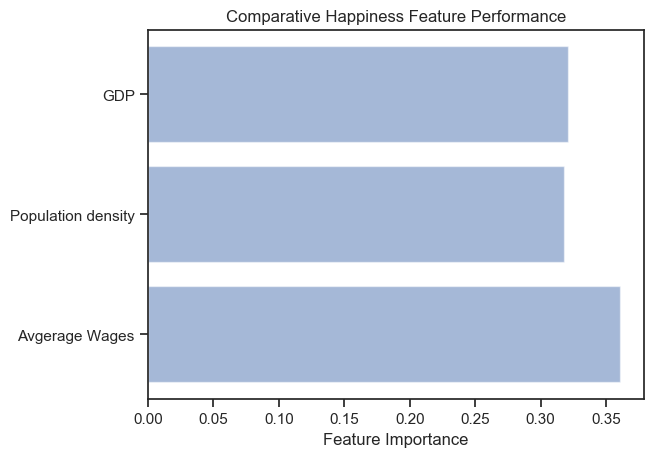

In [20]:
# plot feature importance 

objects = feature_names
y_pos = np.arange(len(objects))
importance = importances

plt.barh(y_pos, importance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Feature Importance')
plt.title('Comparative Happiness Feature Performance')

plt.show()